In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
data = pd.read_csv(r'C:\Users\EL0017\Desktop\ㅋ\딥러닝\Data\house-prices-advanced-regression-techniques\train.csv')

In [5]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
selected_features = ["GrLivArea", "YearBuilt", "TotalBsmtSF", "OverallQual", "GarageCars", "SalePrice"]
new_df = data[selected_features]
new_df.head(5)

,GrLivArea,YearBuilt,TotalBsmtSF,OverallQual,GarageCars,SalePrice
0,1710,2003,856,7,2,208500
1,1262,1976,1262,6,2,181500
2,1786,2001,920,7,2,223500
3,1717,1915,756,7,3,140000
4,2198,2000,1145,8,3,250000


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GrLivArea    1460 non-null   int64
 1   YearBuilt    1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   OverallQual  1460 non-null   int64
 4   GarageCars   1460 non-null   int64
 5   SalePrice    1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB


In [15]:
from sklearn.model_selection import train_test_split
X = new_df.drop(columns=['SalePrice'])
y = new_df['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X , y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 5)
(1168,)
(292, 5)
(292,)


In [ ]:
print(X_test)

      GrLivArea  YearBuilt  TotalBsmtSF  OverallQual  GarageCars
892        1068       1963         1059            6           1
1105       2622       1994         1463            8           2
413        1028       1927         1008            5           2
522        1664       1947         1004            6           2
1036       1620       2007         1620            9           3
...         ...        ...          ...          ...         ...
479        1131       1937          907            4           2
1361       1530       2005         1530            7           2
802        1456       2005          728            7           2
651        1510       1940          755            4           1
722         864       1970          864            4           2

[292 rows x 5 columns]


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)
print(score)


-55638892.799951136


In [43]:
X_test

array([[1.068e+03, 1.963e+03, 1.059e+03, 6.000e+00, 1.000e+00],
       [2.622e+03, 1.994e+03, 1.463e+03, 8.000e+00, 2.000e+00],
       [1.028e+03, 1.927e+03, 1.008e+03, 5.000e+00, 2.000e+00],
       ...,
       [1.456e+03, 2.005e+03, 7.280e+02, 7.000e+00, 2.000e+00],
       [1.510e+03, 1.940e+03, 7.550e+02, 4.000e+00, 1.000e+00],
       [8.640e+02, 1.970e+03, 8.640e+02, 4.000e+00, 2.000e+00]],
      shape=(292, 5))

In [45]:
y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [42]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

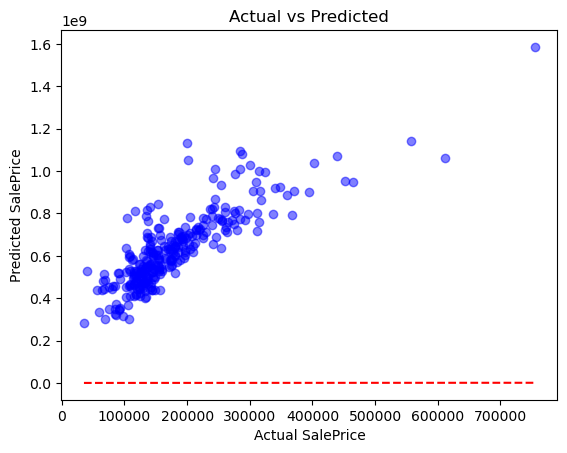

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 정답선
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted")
plt.show()
